import Prerequisits

In [0]:
from sklearn.datasets import load_iris
import numpy as np
import random
from matplotlib import pyplot as plt

define some useful functions

In [0]:
def mean_square_error_loss(pred,y):
  error = np.mean(np.power(y-pred,2),axis=0)/2
  return error 

def sigmoid(x):
  return 1/(1+np.exp(-1*x))

def sigmoid_derivative(x):
  return x*(1-x)

def relu(x):
  return np.maximum(x,0)

def identity(x):
  return x
def identity_derivative(x):
  return np.ones(x.shape)

def relu_derivative(x):
  x[x>0] = 1
  x[x<=0] = 0
  return x

def calc_acc(pred,y):
  num_true_pred = np.count_nonzero(np.argmax(pred,axis = 1) == np.argmax(y,axis = 1))
  return num_true_pred / len(y)

define Model class

In [0]:
class Model:
  layers = []

  def add_layer(self,last_layer_nn,curren_layer_nn,activation,name,activation_derivative):
      layer = {}
      layer['weights'] = np.around((np.random.rand(last_layer_nn,curren_layer_nn))*2-1,1)
      layer['bias'] = np.around(np.random.rand(curren_layer_nn),1)
      layer['activation'] = activation
      layer['name'] = name
      layer['activation_derivative'] = activation_derivative
      self.layers.append(layer)
      return 
      

  def forward_propagation(self,input):
      a = input
      inps = []
      outs = [a]
      for layer in self.layers:
        z = np.matmul(a,layer['weights'])+layer['bias']
        a = layer['activation'](z) 
        inps.append(z)
        outs.append(a)
      pred = a
      return pred,inps,outs
  
  def back_propagation(self, pred , target ,inps,outs):
    m = target.shape[0]
    i = len(self.layers)
    temp_weights = []
    out_layer_flag = True
    
    for layer,inp in zip(self.layers[::-1],inps[::-1]):
      dev_out = layer['activation_derivative'](outs[i]) # out = act(in) ==> dout/din = act(in)
      dev_in = outs[i-1] # in = w1*a1+w2*a2 +...+b ==>  din/dwi = ai
      if(out_layer_flag):
        dev_cost = outs[i] - target # cost = 0.5(pred-target)^2 ==> dcost/dout = pred - target
        next_dev_cost = np.matmul(dev_cost * dev_out , layer['weights'].T) 
        out_layer_flag = False
      else:
        dev_cost = next_dev_cost # dcost/dout_hidden = sigma(dcost_outputs/dout_hidden) = sigma(dcost_outputs/din_outpus * din_outputs/dout_hidden)   
      
      gradient = np.matmul(dev_in.T,(dev_cost*dev_out))/ m #gradient = dcost/dw = (dcost/dout * dout/din * din/dw) mean for all train entries
      temp_weights.append(layer['weights'] - gradient *learning_rate)
      layer['bias'] -= np.mean((dev_cost*dev_out))
      i-=1
    
    for layer,temp_weight in zip(self.layers[::-1],temp_weights):
      layer['weights'] = temp_weight

    return

  def train(self,X_train,y_train,epochs,X_val,y_val):
    history={'loss' :[], 'acc' :[] ,'val_acc' : [] ,'val_loss':[]}
    for epoch in range(epochs):
      pred ,inps,outs = self.forward_propagation(X_train)
      loss = mean_square_error_loss(pred,y_train)
      acc = calc_acc(pred,y_train)
      history['loss'].append(np.mean(loss))
      history['acc'].append(acc)

      pred_val,_,_ = self.forward_propagation(X_val)
      val_loss = mean_square_error_loss(pred_val,y_val)
      val_acc = calc_acc(pred_val,y_val)
      history['val_loss'].append(np.mean(val_loss))
      history['val_acc'].append(val_acc)

      self.back_propagation( pred ,y_train,inps,outs) 
    return history 
    
  def evaluate(self,X_test,y_test):
    pred ,_,_ = self.forward_propagation(X_test)
    loss = mean_square_error_loss(pred,y_test)
    acc = calc_acc(pred,y_test)
    return loss,acc

  def predict(self,X_test):
    pred,_,_ = self.forward_propagation(X_test)
    return np.argmax(pred,axis = 1)


load data

In [0]:
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

prepare data

In [0]:
def shuffle(a,b):
  c = list(zip(a, b))
  random.shuffle(c)
  a, b = zip(*c)
  return a,b
def to_categorical(target):
  temp = np.zeros((target.size, target.max()+1))
  temp[np.arange(target.size),target] = 1
  return temp

y=to_categorical(target)
y,data = shuffle(y,data)
data = np.array(data)
y = np.array(y)

split train and test

In [0]:
m,n = data.shape
X_train = data[int(m/5):,:]
X_test = data[:int(m/5),:]

y_train = y[int(m/5):,:]
y_test = y[:int(m/5),:]

m = m - int(m/5)

define hyperparameters

In [0]:
epochs = 500
learning_rate = 0.5

build a model

In [0]:
model = Model()
model.add_layer(4,8,sigmoid,'hidden_1',sigmoid_derivative)
model.add_layer(8,3,sigmoid,'out',sigmoid_derivative)


train the model

In [0]:
history = model.train(X_train,y_train,epochs,X_test,y_test)

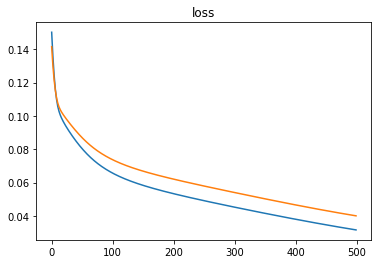

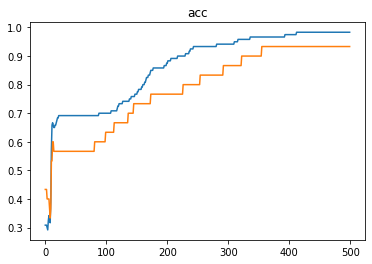

In [616]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('loss')
plt.show()
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('acc')
plt.show()

Evaluate the model

In [617]:
loss ,acc = model.evaluate(X_test,y_test)
print('on test data loss = {} and acc ={}'.format(np.round(np.mean(loss),2),np.round(acc * 100,2)))

on test data loss = 0.04 and acc =93.33


Some predictions

In [618]:
ind = random.randint(0,len(y_test))
print('test input = {}'.format(X_test[ind]))
print('actual result = {}'.format(np.argmax(y_test[ind])))
print('predicted result = {}'.format(model.predict([X_test[ind]])[0]))

test input = [7.7 3.8 6.7 2.2]
actual result = 2
predicted result = 2
